# <center> SICONV - Análise dos Convênios </center>

## Importar as bibliotecas e tabela

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df_convenio = pd.read_csv('siconv_convenio.csv', sep = ';', low_memory=False)

## Estudar a organização dos dados

>Primeiro overview de como são dos dados

In [3]:
pd.set_option('display.max_columns', None)
df_convenio.head(5)

,NR_CONVENIO,ID_PROPOSTA,DIA,MES,ANO,DIA_ASSIN_CONV,SIT_CONVENIO,SUBSITUACAO_CONV,SITUACAO_PUBLICACAO,INSTRUMENTO_ATIVO,IND_OPERA_OBTV,NR_PROCESSO,UG_EMITENTE,DIA_PUBL_CONV,DIA_INIC_VIGENC_CONV,DIA_FIM_VIGENC_CONV,DIA_FIM_VIGENC_ORIGINAL_CONV,DIAS_PREST_CONTAS,DIA_LIMITE_PREST_CONTAS,DATA_SUSPENSIVA,DATA_RETIRADA_SUSPENSIVA,DIAS_CLAUSULA_SUSPENSIVA,SITUACAO_CONTRATACAO,IND_ASSINADO,MOTIVO_SUSPENSAO,IND_FOTO,QTDE_CONVENIOS,QTD_TA,QTD_PRORROGA,VL_GLOBAL_CONV,VL_REPASSE_CONV,VL_CONTRAPARTIDA_CONV,VL_EMPENHADO_CONV,VL_DESEMBOLSADO_CONV,VL_SALDO_REMAN_TESOURO,VL_SALDO_REMAN_CONVENENTE,VL_RENDIMENTO_APLICACAO,VL_INGRESSO_CONTRAPARTIDA,VL_SALDO_CONTA,VALOR_GLOBAL_ORIGINAL_CONV
0,782624,716232,1.0,1.0,2014.0,01/01/2014,Prestação de Contas em Análise,NaN,Publicado,SIM,SIM,23075008985201376,153079.0,22/01/2014,01/01/2014,01/09/2014,31/07/2014,60,27/05/2015,NaN,NaN,NaN,Normal,SIM,NaN,NÃO,1,1.0,NaN,37720,37720,0,37720,37720,"741,14",NaN,NaN,NaN,0,NaN
1,923584,1731291,1.0,1.0,2022.0,01/01/2022,Em execução,NaN,Publicado,SIM,SIM,23079240911202101,153115.0,07/01/2022,01/01/2022,14/10/2026,14/10/2026,60,13/12/2026,NaN,NaN,NaN,Normal,SIM,NaN,NÃO,1,4.0,NaN,"2452251,26","2452251,26",0,"1892456,12","1892455,66",NaN,NaN,NaN,NaN,"559495,93","1865985,31"
2,715100,16734,1.0,2.0,2010.0,01/02/2010,Prestação de Contas Aprovada,NaN,Publicado,NÃO,NÃO,08012.003972/2008-94,200401.0,04/02/2010,01/02/2010,30/01/2011,30/01/2011,90,11/05/2011,NaN,NaN,NaN,NaN,SIM,NaN,NÃO,1,NaN,NaN,"79180,62","66580,52","12600,1","66580,52","66580,52","2308,71",NaN,NaN,"6000,1",0,NaN
3,725100,110332,1.0,2.0,2011.0,01/02/2011,Convênio Anulado,NaN,Publicado,NÃO,NÃO,072624/2009,175004.0,04/02/2011,01/02/2011,30/06/2012,30/06/2012,60,29/08/2012,31/07/2011,NaN,180.0,Sob Liminar Judicial e Cláusula Suspensiva,SIM,Titularidade de Área e Projeto de Engenharia,NÃO,1,1.0,NaN,287000,275520,11480,0,NaN,NaN,NaN,NaN,NaN,0,NaN
4,774555,633285,1.0,2.0,2013.0,01/02/2013,Prestação de Contas Concluída,NaN,Publicado,NÃO,SIM,610026/2012-7,364102.0,08/02/2013,01/02/2013,31/05/2017,31/05/2016,30,12/12/2017,NaN,NaN,NaN,Normal,SIM,NaN,NÃO,1,2.0,NaN,1200000,800000,400000,800000,800000,"332112,63","166056,05",NaN,400000,0,NaN


>Verificação dos tipos dos dados e quantidade de valores nulos

In [4]:
df_convenio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251908 entries, 0 to 251907
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NR_CONVENIO                   251908 non-null  int64  
 1   ID_PROPOSTA                   251908 non-null  int64  
 2   DIA                           205341 non-null  float64
 3   MES                           205341 non-null  float64
 4   ANO                           205341 non-null  float64
 5   DIA_ASSIN_CONV                205341 non-null  object 
 6   SIT_CONVENIO                  235111 non-null  object 
 7   SUBSITUACAO_CONV              1298 non-null    object 
 8   SITUACAO_PUBLICACAO           251908 non-null  object 
 9   INSTRUMENTO_ATIVO             251908 non-null  object 
 10  IND_OPERA_OBTV                251908 non-null  object 
 11  NR_PROCESSO                   251907 non-null  object 
 12  UG_EMITENTE                   219191 non-nul

>Verificando o resumo dos dados

In [5]:
df_convenio.describe()

,NR_CONVENIO,ID_PROPOSTA,DIA,MES,ANO,UG_EMITENTE,DIAS_PREST_CONTAS,DIAS_CLAUSULA_SUSPENSIVA,QTDE_CONVENIOS,QTD_TA,QTD_PRORROGA
count,251908.000000,2.519080e+05,205341.000000,205341.000000,205341.000000,219191.000000,251908.000000,23092.000000,251908.0,129853.000000,77455.000000
mean,834679.942662,1.044068e+06,23.109053,10.635572,2015.565406,275508.880109,44.904211,441.507405,1.0,3.099813,1.842812
std,76462.961462,5.948498e+05,8.703872,2.265233,4.575226,164922.585406,52.978114,274.742959,0.0,2.771606,1.499233
min,700001.000000,1.390000e+03,1.000000,1.000000,2008.000000,70003.000000,0.000000,0.000000,1.0,1.000000,1.000000
25%,767930.750000,5.230678e+05,17.000000,10.000000,2011.000000,175004.000000,0.000000,273.000000,1.0,1.000000,1.000000
50%,835898.500000,1.083546e+06,27.000000,12.000000,2016.000000,180006.000000,60.000000,449.000000,1.0,2.000000,1.000000
75%,900890.250000,1.537750e+06,30.000000,12.000000,2019.000000,380908.000000,60.000000,548.000000,1.0,4.000000,2.000000
max,966103.000000,2.002997e+06,31.000000,12.000000,2024.000000,885340.000000,4685.000000,2939.000000,1.0,81.000000,28.000000


## Transformar os dados

>Transformando as colunas de data

In [6]:
colunas = ['DIA_ASSIN_CONV', 
           'DIA_PUBL_CONV',
           'DIA_INIC_VIGENC_CONV',
           'DIA_FIM_VIGENC_CONV',
           'DIA_FIM_VIGENC_ORIGINAL_CONV',
           'DIA_LIMITE_PREST_CONTAS',
           'DATA_SUSPENSIVA',
           'DATA_RETIRADA_SUSPENSIVA']

for coluna in colunas:
    df_convenio[coluna] = pd.to_datetime(df_convenio[coluna], format='%d/%m/%Y',errors='coerce')

>Transformando as colunas de valor em float, mudando o separador do decimal de vírgula para ponto

In [7]:
colunas = ['VL_GLOBAL_CONV',
            'VL_REPASSE_CONV',
            'VL_CONTRAPARTIDA_CONV',
            'VL_EMPENHADO_CONV',
            'VL_DESEMBOLSADO_CONV',
            'VL_SALDO_REMAN_TESOURO',
            'VL_SALDO_REMAN_CONVENENTE',
            'VL_RENDIMENTO_APLICACAO',
            'VL_INGRESSO_CONTRAPARTIDA',
            'VL_SALDO_CONTA',
            'VALOR_GLOBAL_ORIGINAL_CONV']

for coluna in colunas:
    df_convenio[coluna] = df_convenio[coluna].str.replace(',', '.').astype(float)

## Análise dos dados

>1. Qual a situação atual dos convênios?

In [8]:
situacao_convenio = df_convenio[['SIT_CONVENIO']].value_counts().reset_index().rename(columns={0:'frequencia'})
situacao_convenio['%_frequencia'] = situacao_convenio['frequencia'] / situacao_convenio['frequencia'].sum()*100

In [9]:
situacao_convenio.head()

,SIT_CONVENIO,frequencia,%_frequencia
0,Prestação de Contas Concluída,72181,30.700818
1,Prestação de Contas Aprovada,42619,18.127182
2,Em execução,39283,16.708278
3,Proposta/Plano de Trabalho Aprovado,21869,9.301564
4,Convênio Anulado,21811,9.276895


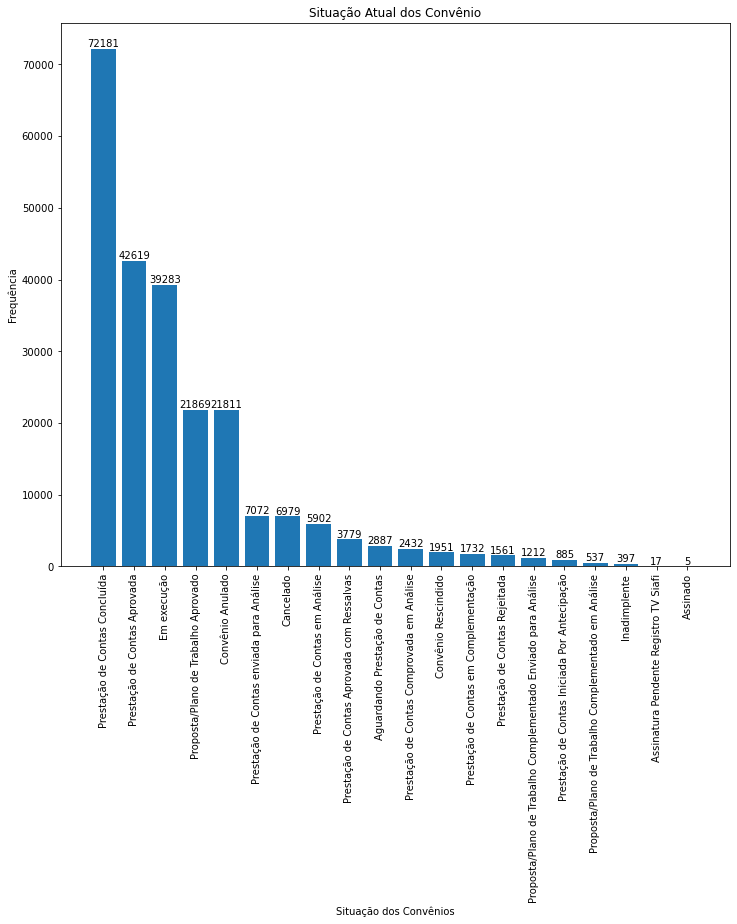

In [10]:
plt.figure(figsize=(12, 10))

plt.bar(x=situacao_convenio['SIT_CONVENIO'],height=situacao_convenio['frequencia'])

plt.xticks(rotation=90)
plt.title("Situação Atual dos Convênio")
plt.xlabel("Situação dos Convênios")
plt.ylabel("Frequência")

for i, value in enumerate(situacao_convenio['frequencia']):
    plt.text(situacao_convenio['SIT_CONVENIO'][i], value, str(value),ha='center', va='bottom')

A maioria dos convênios se encontram na fase de Prestação de Contas Concluídas (72.181), seguido de Prestação de Contas Aprovadas (42.619) ou Em Execução (39.283), sendo que, somados, estes representam 65,53% do total dos convênios.

>Qual o montante dos convênios ao longo dos anos?

In [11]:
montante = df_convenio[['ANO', 'VL_GLOBAL_CONV']]

In [12]:
pd.options.display.float_format = '{:.2f}'.format
montante = montante.groupby('ANO').sum()

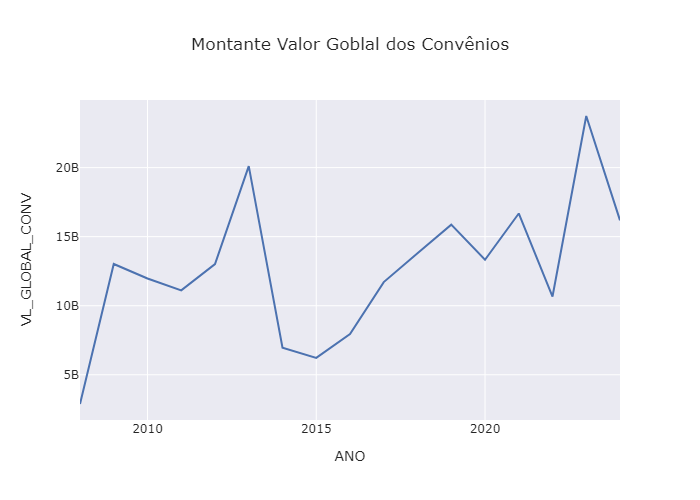

In [13]:
fig = px.line(montante,
              x        = montante.index, 
              y        = 'VL_GLOBAL_CONV',
              title    = 'Montante Valor Goblal dos Convênios',
              template = 'seaborn')

fig.show("png")

Os convênios tiveram os menores valores durante os anos de 2014 e 2015 e alcançou o maior valor em 2023, em que atingiu o total de mais de R$ 23 bilhões, representando um aumento de 281,51% comparando os dois períodos. 